# Praca Domowa 6

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Zadania

### Zadanie 1

a) Narysować wykres y=x^3+1 dla x z przedziału [-3, 3]. Dodać wycentrowany tytuł oraz opisy osi.

b) Do tego samego wykresu dodać wybraną inną funkcję i oznaczyć ją linią o innym kolorze i grubości. Dodać legendę.

c) Pokazać wykresy z a) i b) osobno używając funkcji subplot().

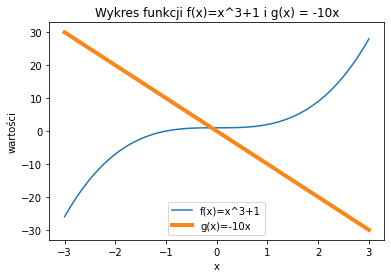

In [162]:
x = np.linspace(-3, 3, 100)
values = x**3+1
plt.plot(x, values, label="f(x)=x^3+1")

plt.plot(x, -10*x, label = "g(x)=-10x", color = "#FB871A", lw=4)

plt.title("Wykres funkcji f(x)=x^3+1 i g(x) = -10x")
plt.xlabel("x")
plt.ylabel("wartości")
plt.legend()
plt.show()

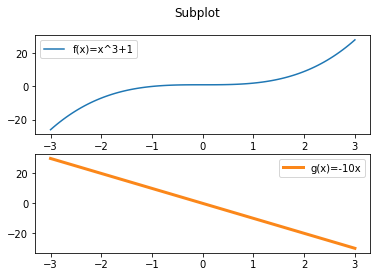

In [4]:
fig, (ax1, ax2) = plt.subplots(2, 1) # 2 wiersze, 1 kolumna
fig.suptitle('Subplot')

ax1.plot(x, values, label="f(x)=x^3+1")
ax1.legend()


ax2.plot(x, -10*x, label = "g(x)=-10x", color = "#FB871A", lw=3)
ax2.legend()



plt.show()

# Zadanie 2

a) Narysować wykres słupkowy na podanych danych.

b) Znaleźć sposób (w internecie) na narysowanie wykresu kołowego na podanych danych.
 

In [5]:
labels = ['Blue', 'Red', 'Green', 'Purple']
sizes = [15, 30, 45, 10]

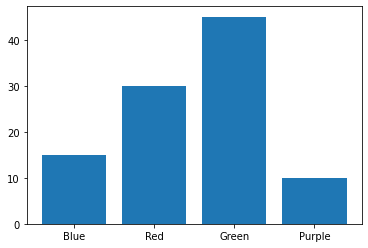

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.bar(labels, sizes)
plt.show()

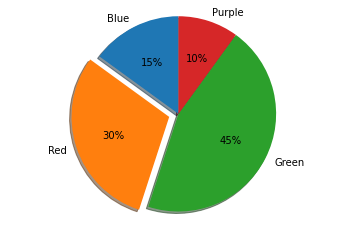

In [163]:
fig1, ax1 = plt.subplots()

explode = (0, 0.1, 0, 0)

ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.0f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()

# Zadanie 3

Poprawić wykres tak, aby łatwiej było odczytać w którym województwie śmiertelność wzrosła najbardziej.
Jest przynajmniej kilka innych podejść: scatterplot z latami na osi OX/OY, odcinki zaczynające się w danych ze średniej a kończące w 2020.
Jestem też ciekawa Waszych innych pomysłów.

![https://static.im-g.pl/im/7/26498/m26498997,WOJEWODZTWA2.png](https://static.im-g.pl/im/7/26498/m26498997,WOJEWODZTWA2.png)

Źródło: https://static.im-g.pl/im/7/26498/m26498997,WOJEWODZTWA2.png

In [99]:
wojewodztwo = ["ZACHODNIOPOMORSKIE", "WIELKOPOLSKIE", "WARMINSKO-MAZURSKIE", "SWIETOKRZYSKIE",  "SLASKIE",
               "POMORSKIE", "PODLASKIE", "PODKARPACKIE", "OPOLSKIE", "MAZOWIECKIE", "MALOPOLSKIE", "LODZKIE",
               "LUBUSKIE", "LUBELSKIE", "KUJAWSKO-POMORSKIE", "DOLNOSLASKIE"]

l_2020 = [1874, 4013, 1565, 2008, 6270, 2521, 1468, 2909, 1356, 6564, 4743, 3687, 1313, 2731, 2435, 3665]

l_2015_2019 = [1509, 2796, 1241, 1208, 4255, 1830, 1049, 1643, 881, 4811, 2690, 2578, 894, 1920, 1768, 2683]

import pandas as pd

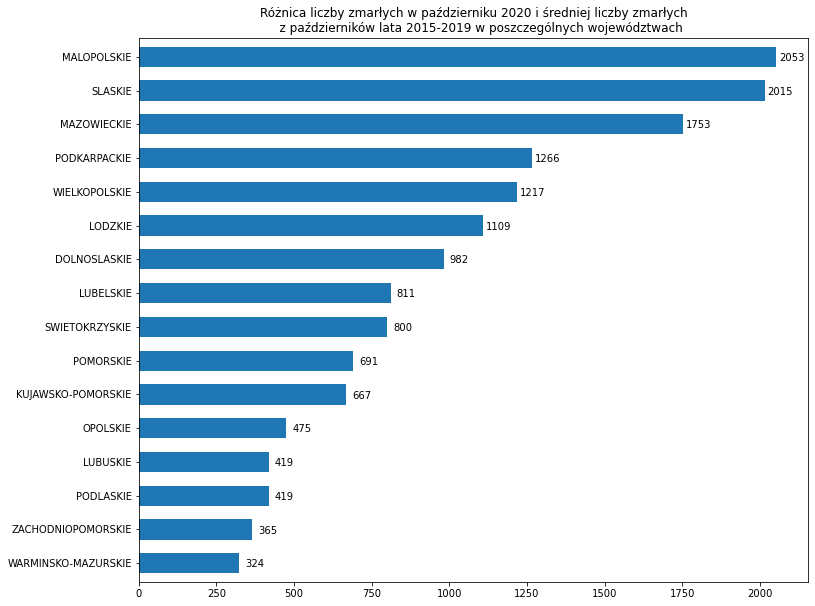

In [164]:
y = list(np.array(l_2020)-np.array(l_2015_2019))

df = pd.DataFrame( {'values': y, 'województwo': wojewodztwo})

ax = df.sort_values( by = 'values').plot.barh(
    x = 'województwo',
    legend = False,
    title = '''Różnica liczby zmarłych w październiku 2020 i średniej liczby zmarłych
    z październików lata 2015-2019 w poszczególnych województwach''',
    width = 0.6,
    figsize=(12,10)
)

plt.ylabel("")

for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f'), 
                   (p.get_x() + p.get_width()+50 , p.get_y() ), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.show()



# Zadanie 4

Zrobić własny wykres w stylu xkcd dotyczący wizualzacji danych. Może być bardzo luźno związany.

Jeśli ktoś nie trafił na komiksy xkcd, to polecam przejrzeć zajrzeć na stronę Randalla Munroe: https://xkcd.com/

Tu kilka przykładów, które mogą być inspiracją albo chociaż rozrywką:
- https://xkcd.com/688/
- https://xkcd.com/1597/ - True story jak Wam pokazałam gita :(
- https://xkcd.com/1945/

Matplotlib pozwala na proste tworzenie wykresów w stylu xkcd, służy do tego funkcja `xkcd()` z `matplotlib.pyplot`.
Warto zajrzeć do dokumentacji: https://matplotlib.org/gallery/showcase/xkcd.html
Mój przykład umieściłam poniżej.

Uwaga, w szczególności styl działa też z wykresami kołowymi i słupkowymi.

### Przykład (rozwiązanie pod nim)

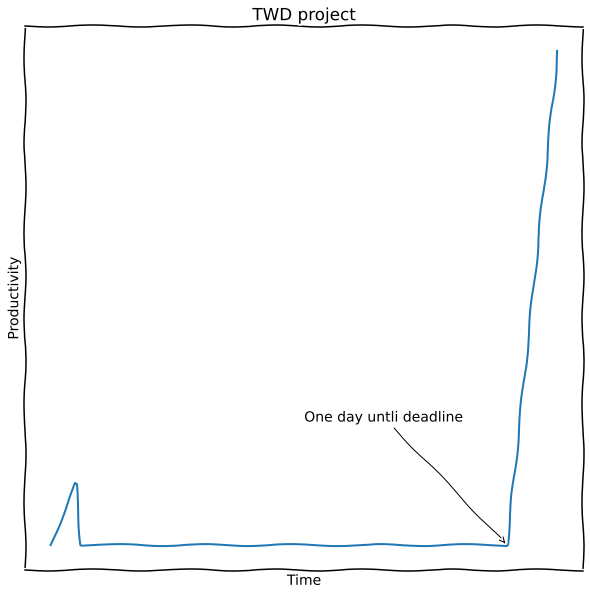

In [49]:
x = [0, 0.05, 0.06, 0.9, 1]
y = [0, 0.5, 0, 0, 4]

# rysowanie w xkcd mode
with plt.xkcd():
    # ustawienie rozmiaru
    plt.figure(figsize=(10,10))
    
    plt.plot(x,y)
    
    # usuniecie podpisow osi
    plt.xticks([])
    plt.yticks([])
    
    # dodanie napisow
    plt.title("TWD project")
    plt.xlabel('Time')
    plt.ylabel('Productivity')

    plt.annotate(
        'One day untli deadline',
        xy=(0.9, 0), arrowprops=dict(arrowstyle='->'), xytext=(0.5, 1))
plt.show()

### Rozwiązanie

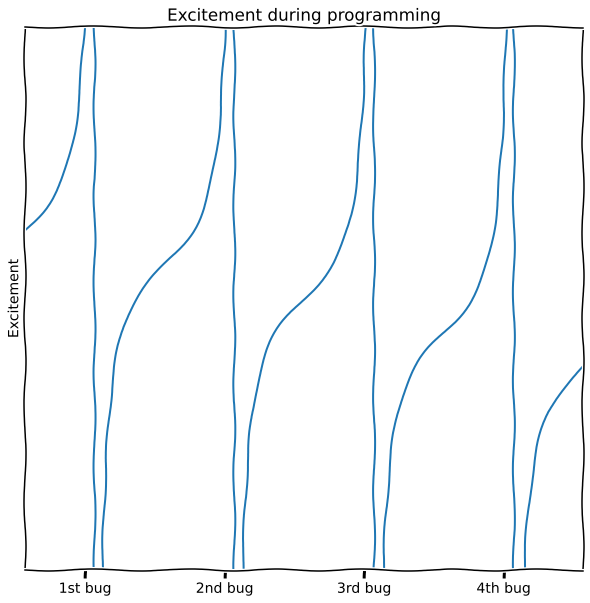

In [161]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
y = np.tan(x)-x/5

strings = ["1st", "2nd", "3rd", "4th"]

with plt.xkcd():
    # ustawienie rozmiaru
    plt.figure(figsize=(10,10))
    
    plt.plot(x,y)
    plt.ylim(-5, 5)
    plt.xlim(-2 * np.pi, 2 * np.pi)
    # usuniecie podpisow osi
    plt.xticks([(-1.57 + i) * np.pi for i in range(4)], 
               [strings[i] + ' bug' for i in range(4)])
    plt.yticks([])
    
    # dodanie napisow
    plt.title("Excitement during programming")
    plt.ylabel('Excitement')


plt.show()